# Working With Imbalanced Data

## Installation via Anaconda command line
Paste following code and hit enter:

conda install -c glemaitre imbalanced-learn


In [3]:
# Run below to install updated version of imblearn
! pip install imbalanced-learn --user


  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


## Oversampling
One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:


In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Make some data:

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Count each value of y
print(pd.Series(y).value_counts())

print(pd.Series(y_resampled).value_counts())

2    4674
1     262
0      64
dtype: int64
2    4674
1    4674
0    4674
dtype: int64


In [23]:
#proportions
print(pd.Series(y_resampled).value_counts(normalize=True))


2    0.333333
1    0.333333
0    0.333333
dtype: float64


#The augmented data set should be used instead of the original data set to train a classifier:



In [24]:
# Notice that we run a model on the original data, then the resampled data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

logreg = LogisticRegression().fit(X,y)
y_pred = logreg.predict(X) # y_pred includes your predictions

print(classification_report(y, y_pred)) # precision recall and f1
print(logreg.score(X, y)) #accuracy 



              precision    recall  f1-score   support

           0       1.00      0.69      0.81        64
           1       0.96      0.84      0.90       262
           2       0.99      1.00      0.99      4674

    accuracy                           0.99      5000
   macro avg       0.98      0.84      0.90      5000
weighted avg       0.99      0.99      0.99      5000

0.9874


In [ ]:
# The resampled model influences precision and recall for categories with imbalanced data

logreg = LogisticRegression().fit(X_resampled,y_resampled)
y_pred = logreg.predict(X_resampled) # y_pred includes your predictions

print(classification_report(y_resampled, y_pred)) # precision recall and f1
print(logreg.score(X_resampled, y_resampled)) #accuracy 

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4674
           1       0.92      0.86      0.89      4674
           2       0.79      0.93      0.86      4674

    accuracy                           0.85     14022
   macro avg       0.86      0.85      0.85     14022
weighted avg       0.86      0.85      0.85     14022

0.8526601055484239


As a result, the majority class does not take over the other classes during the training process. Consequently, all classes are represented by the decision function.

# Plot random oversampling

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
X_res_vis = pca.transform(X_resampled)



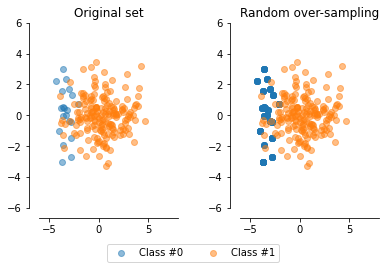

In [ ]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# Random Undersampling

0    900
1    100
dtype: int64


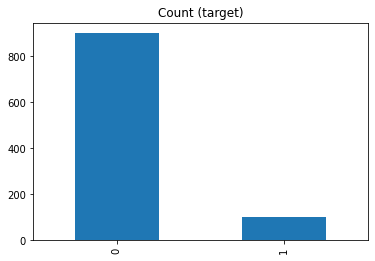

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');


print(pd.Series(y).value_counts())



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())


0    100
1    100
dtype: int64


Of course we lose a lot of data when we undersample.  Better to oversample minority class while keeping the signal from the data, if possible.
### Enter Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)



In [ ]:
#Original Data
print(pd.Series(y_sm).value_counts())


0    900
1    900
dtype: int64


In [ ]:
#New Data

print(pd.Series(y_sm).value_counts())


0    900
1    900
dtype: int64


## Modeling smote data

In [ ]:

#Original data fit

logreg = LogisticRegression().fit(X,y)
y_pred = logreg.predict(X) # y_pred includes your predictions

print(classification_report(y, y_pred)) # precision recall and f1
print(logreg.score(X, y)) #accuracy 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       900
           1       0.98      0.87      0.92       100

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.96      1000
weighted avg       0.98      0.98      0.98      1000

0.985


In [ ]:
# Smote oversample of minority classes

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
#smote data fit

logreg = LogisticRegression().fit(X_sm,y_sm)
y_pred = logreg.predict(X_sm) # y_pred includes your predictions

print(classification_report(y_sm, y_pred)) # precision recall and f1
print(logreg.score(X_sm, y_sm)) #accuracy 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       900
           1       0.97      0.97      0.97       900

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800

0.9716666666666667


## Combination of over- and under-sampling

In [ ]:
# We can use SMOTE with a second technique that dismisses nearest
# neighbors that have diff't classes before creating synthetic observations (i.e.-delete all Tomek links)


from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X, y)

logreg = LogisticRegression().fit(X_smt,y_smt)
y_pred = logreg.predict(X_smt) # y_pred includes your predictions

print(classification_report(y_smt, y_pred)) # precision recall and f1
print(logreg.score(X_smt, y_smt)) #accuracy increases a bit, but we should test on new data

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       900
           1       0.97      0.97      0.97       900

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800

0.9727777777777777


## Now you try to improve prediction error on new data:

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
bc_load_data = load_breast_cancer()

print(list(bc_load_data.target_names))

y = bc_load_data.target
X = bc_load_data.data

print(pd.Series(y).value_counts(normalize=True))

X.shape


['malignant', 'benign']
1    0.627417
0    0.372583
dtype: float64


(569, 30)

In [ ]:
# We didn't split data into training and test sets consistently above. But you should do so here to score test data.